In [4]:
import numpy as np
import pandas as pd

In [5]:
# df_1 = pd.read_csv('titanic_data.csv')
pass_link = 'https://www.dropbox.com/s/lyzcuxu1pdrw5qb/titanic_data.csv?dl=1'
titanic_passengers = pd.read_csv(pass_link, index_col='PassengerId') # index_col=?

In [ ]:
print('Всего пассажиров: ', len(titanic_passengers))
titanic_passengers.head(10)

In [7]:
titanic_passengers.shape ## размер таблицы

(891, 10)

In [14]:
titanic_passengers.info() ## информацию о значениях таблицы

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [33]:
titanic_passengers.describe() ## различные статистики по значениям

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## Задание 1
Опишите данный датасет: какое расределение женщин/мужчин в нем? Сколько пассажиров ехало в каждом классе? Какой средний/минимальный/максимальный возраст пассажиров?


In [20]:
sex = (titanic_passengers['Sex'].value_counts())
print("Расределение женщин/мужчин:\n", sex)

Расределение женщин/мужчин:
 male      577
female    314
Name: Sex, dtype: int64


In [22]:
count = (titanic_passengers['Pclass'].value_counts())
print("Пассажиров ехало в каждом классе: \n", count)

Пассажиров ехало в каждом классе: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


In [26]:
min = titanic_passengers['Age'].min()
mean = titanic_passengers['Age'].mean()
max = titanic_passengers['Age'].max()

print("Cредний возраст пассажиров: ", round(mean, 2))
print("Mинимальный возраст пассажиров: ", round(min, 2))
print("Mаксимальный возраст пассажиров: ", round(max, 2))

Cредний возраст пассажиров:  29.7
Mинимальный возраст пассажиров:  0.42
Mаксимальный возраст пассажиров:  80.0



## Задание 2
Сгруппируйте записи по классам пассажиров, в каждой группе посчитайте средний возраст. Используйте метод ``pandas.DataFrame.groupby``.

In [27]:
group = titanic_passengers.groupby('Pclass')['Age'].mean()
print("Средний возраст в каждой группе класса: \n", round(group, 2))

Средний возраст в каждой группе класса: 
 Pclass
1    38.23
2    29.88
3    25.14
Name: Age, dtype: float64


## Слияние таблиц
Таблицы можно сливать несколькими способами. Мы рассмотрим слияние по индексу: метод называется ``pd.join``.

In [34]:
# df_2 = pd.read_csv('titanic_surv.csv')
surv_link = 'https://www.dropbox.com/s/v35x9i6a1tc7emm/titanic_surv.csv?dl=1'
df_2 = pd.read_csv(surv_link)

In [60]:
df_2.describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df_2.head()


### Задание 3.
Слейте два датасета по колонке индекса.

In [67]:
merge = titanic_passengers.join(df_2)
print(merge)


             Pclass                                               Name  \
PassengerId                                                              
1                 3                            Braund, Mr. Owen Harris   
2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3                 3                             Heikkinen, Miss. Laina   
4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5                 3                           Allen, Mr. William Henry   
...             ...                                                ...   
887               2                              Montvila, Rev. Juozas   
888               1                       Graham, Miss. Margaret Edith   
889               3           Johnston, Miss. Catherine Helen "Carrie"   
890               1                              Behr, Mr. Karl Howell   
891               3                                Dooley, Mr. Patrick   

                Sex   Age  SibSp  Par

### Задание 4.
Сколько всего выживших пассажиров? Выживших пассажиров по каждому из полов? Постройте матрицу корреляций факта выживания, пола и возраста.

In [56]:
live = df_2['Survived'].sum()
print("Всего выживших пассажиров: ", live)

Всего выживших пассажиров:  342


In [68]:
live_sex = merge.groupby('Sex')['Survived'].sum().astype(int)
print("Всего выживших пассажиров по каждому из полов: \n", live_sex)

Всего выживших пассажиров по каждому из полов: 
 Sex
female    121
male      221
Name: Survived, dtype: int64


In [76]:
merge['Sex'] = merge['Sex'].map({'male': 0, 'female': 1})
correlation_matrix = merge[['Survived', 'Sex', 'Age']].corr(numeric_only=True)
print(correlation_matrix)

          Survived       Sex       Age
Survived  1.000000  0.001640 -0.003541
Sex       0.001640  1.000000 -0.093254
Age      -0.003541 -0.093254  1.000000


In [37]:
import seaborn as sns

<Axes: >

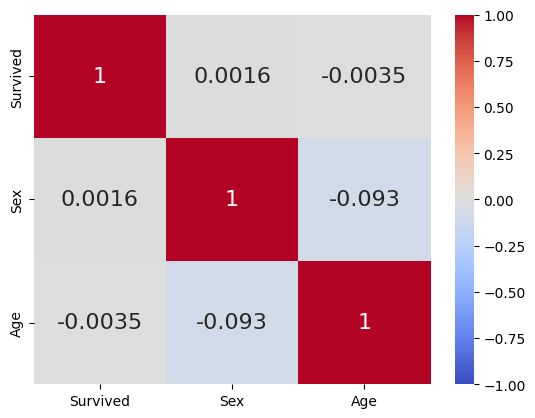

In [77]:
sns.heatmap(
    correlation_matrix,
    annot=True, cmap='coolwarm',
    vmin=-1, vmax=1,
    annot_kws={"size": 16}
)
